# INSY 669 Group Assignment 

## Fetch Reviews

In [3]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import csv
# from requests_html import HTMLSession

In [2]:
entries = []
entry = []
urlnumber = 200 # Give the page number to start with


while urlnumber < 310: # Give the page number to end with
    print(urlnumber)
    url = 'http://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p%d' % (urlnumber,) # Give the url of the forum, excluding the page number in the hyperlink

    try:
        r = requests.get(url, timeout = 10) # Sending a request to access the page
    except Exception as e:
        print("Error message:",e)
        break;

    data = r.text
    
    soup = BeautifulSoup(data, 'lxml') # Getting the page source into the soup
    
    for div in soup.find_all('div'):
        entry = []
        if(div.get('class') != None and div.get('class')[0] == 'Comment'): # A single post is referred to as a comment. Each comment is a block denoted in a div tag which has a class called comment.
            ps = div.find_all('p') # gets all the tags called p to a variable ps
            aas = div.find_all('a') # gets all the tags called a to a variable aas
            spans = div.find_all('span')
            times = div.find_all('time') # used to extract the time tag which gives the iDate of the post

            concat_str = ''
            for str in aas[1].contents: # prints the contents that is between the tag start and end
                if str != "<br>" or str != "<br/>": # breaks in post which we need to work around
                    concat_str = (concat_str + ' '+ str).encode("utf-8").strip() # the format extracted is a unicode - we need a uniform structure to work with the strings
            entry.append(concat_str)

            concat_str = ''
            for str in times[0].contents:
                if str != "<br>" or str != "<br/>":
                    concat_str = (concat_str + ' '+ str).encode('iso-8859-1').strip()
            entry.append(concat_str)

            for div in div.find_all('div'):
                if (div.get('class') != None and div.get('class')[0] == 'Message'): # extracting the div tag with the class attribute as message
                    blockquotes = []
                    x = div.get_text()
                    for bl in div.find_all('blockquote'):
                        blockquotes.append(bl.get_text()) # block quote is used to get the quote made by a person. get_text helps to eliminate the hyperlinks and pulls out only the data.
                        bl.decompose()
                    # Encoding the text to ascii code by replacing the non-ascii characters
                    ascii_encoding = div.get_text().replace("\n"," ").replace("<br/>","").encode('ascii','replace')
                    # Convert the ASCII encoding to Latin1 encoding
                    latin1_encoding = ascii_encoding.decode('ascii').encode('iso-8859-1')
                    # Append the encoding bytes to output list
                    entry.append(latin1_encoding)

                    for bl in blockquotes:
                        ascii_encoding = bl.replace("\n"," ").replace("<br/>","").encode('ascii','replace')
                        latin1_encoding = ascii_encoding.decode('ascii').encode('iso-8859-1')
                        entry.append(latin1_encoding)

            entries.append(entry)
            
    urlnumber += 1

# Convert a list of byte to list a of string     
stringlist=[[x.decode('iso-8859-1') for x in entry] for entry in entries]
# Save the list to a csv file
with open('edmunds_extraction1.csv', 'w') as output:
    writer = csv.writer(output, quoting=csv.QUOTE_ALL)
    writer.writerows(stringlist)

print ("Wrote to edmunds_extraction1.csv")

200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
Wrote to edmunds_extraction1.csv


In [4]:
review = pd.read_csv('edmunds_extraction1.csv',names=['User','Date','Review'],header=None)
                    #,parse_dates=['Date'])

## Preprocessing & Brand Count

In [5]:
df = pd.read_csv("models.csv", names=['Brand','Model'], header=None)
df["Brand"] = df["Brand"].str.lower()
df = df.drop_duplicates()
df.to_csv('clean_model.csv')  

In [6]:
car = pd.read_csv("clean_model.csv")
review = pd.read_csv("edmunds_extraction1.csv",names=['User','Date','Review'],header=None)

In [7]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
tokenized = []
for i in review["Review"]:
    text = word_tokenize(i)
    for j in range(len(text)):
        if any(text[j]==car['Model']):
            brand = car.loc[car.Model==text[j],'Brand'].iloc[0]
            text[j] = brand
    tokenized.append(text)

In [9]:
def remove_duplicate(mylist):
    mylist = list(dict.fromkeys(mylist))
    return mylist

review_brands = []
for sent in tokenized:
    brand_post=[]
    for m in range(len(sent)):
        if any(sent[m].lower()==car['Brand']):
            brand_post.append(sent[m].lower())
    if brand_post != []:
        brand_post = remove_duplicate(brand_post)
        review_brands.append(brand_post)
review_brands

[['car', 'bmw', 'chevrolet', 'cadillac'],
 ['toyota', 'car', 'cadillac', 'saturn'],
 ['car', 'audi', 'bmw'],
 ['car'],
 ['cadillac', 'bmw', 'mercedes', 'audi', 'sedan'],
 ['car'],
 ['car', 'sedan', 'bmw', 'chevrolet', 'cadillac', 'ford'],
 ['chevrolet', 'car', 'infiniti', 'bmw', 'audi'],
 ['ford', 'car', 'volvo'],
 ['car'],
 ['bmw'],
 ['bmw'],
 ['bmw'],
 ['honda', 'toyota', 'bmw'],
 ['chevrolet', 'car'],
 ['toyota', 'honda'],
 ['problem', 'car'],
 ['car'],
 ['car'],
 ['lincoln'],
 ['lincoln', 'cadillac', 'bmw', 'ford', 'honda', 'seat', 'car'],
 ['car'],
 ['seat', 'car'],
 ['cadillac', 'problem', 'bmw', 'car', 'infiniti'],
 ['car'],
 ['dodge', 'car', 'bmw', 'seat'],
 ['audi'],
 ['bmw', 'problem', 'infiniti', 'car'],
 ['seat', 'car', 'mercedes', 'bmw', 'audi', 'infiniti', 'acura'],
 ['car'],
 ['car', 'bmw'],
 ['audi', 'seat', 'bmw'],
 ['bmw', 'car', 'acura', 'mercedes'],
 ['cadillac', 'problem', 'car'],
 ['car', 'bmw'],
 ['bmw', 'problem', 'car'],
 ['car', 'bmw'],
 ['car'],
 ['bmw'],
 ['

In [10]:
company =  car['Brand'].unique()
count_dict = {}
for i in company:
    count = 0
    for j in review_brands:
        if i in j:
            count +=1
            
    count_dict[i] = count

In [11]:
count_dict

{'acura': 886,
 'audi': 523,
 'bmw': 1626,
 'buick': 114,
 'cadillac': 127,
 'car': 2534,
 'chevrolet': 115,
 'chrysler': 55,
 'dodge': 35,
 'ford': 124,
 'honda': 413,
 'hyndai kia': 0,
 'hyundai': 95,
 'hyundai,': 0,
 'hyundai.': 1,
 'infiniti': 489,
 'kia': 26,
 'kia,': 0,
 'kia.': 0,
 'lincoln': 25,
 'mazda': 78,
 'mercedes': 160,
 'mercury': 2,
 'mitsubishi': 7,
 'nissan': 160,
 'nissan.': 0,
 'pontiac': 25,
 'problem': 317,
 'saturn': 5,
 'seat': 297,
 'sedan': 433,
 'subaru': 68,
 'suzuki': 4,
 'toyata': 0,
 'toyota': 241,
 'volkswagen': 44,
 'volkwagen': 0,
 'volvo': 142}

In [12]:
# count_dict data cleaning

# all non-brand keys and brands with value 0
lst = ['car','hyndai kia','hyundai,','hyundai.','kia','kia,','kia.','nissan.','problem','seat','toyata','volkwagen']

# data cleaning for hyundai kia
count_dict['hyundai']=95+1+26

# drop keys in lst
for key, value in list(count_dict.items()):
    if key in lst:
        del count_dict[key]

In [13]:
count_dict

{'acura': 886,
 'audi': 523,
 'bmw': 1626,
 'buick': 114,
 'cadillac': 127,
 'chevrolet': 115,
 'chrysler': 55,
 'dodge': 35,
 'ford': 124,
 'honda': 413,
 'hyundai': 122,
 'infiniti': 489,
 'lincoln': 25,
 'mazda': 78,
 'mercedes': 160,
 'mercury': 2,
 'mitsubishi': 7,
 'nissan': 160,
 'pontiac': 25,
 'saturn': 5,
 'sedan': 433,
 'subaru': 68,
 'suzuki': 4,
 'toyota': 241,
 'volkswagen': 44,
 'volvo': 142}

In [14]:
brand_count_df = pd.DataFrame.from_dict(count_dict, orient='index',
                       columns=['Count']).sort_values('Count', ascending=False)
brand_count_df.reset_index(inplace=True)
brand_count_df.rename(columns={'index':'Brand'},inplace=True)
brand_count_df

,Brand,Count
0,bmw,1626
1,acura,886
2,audi,523
3,infiniti,489
4,sedan,433
5,honda,413
6,toyota,241
7,nissan,160
8,mercedes,160
9,volvo,142


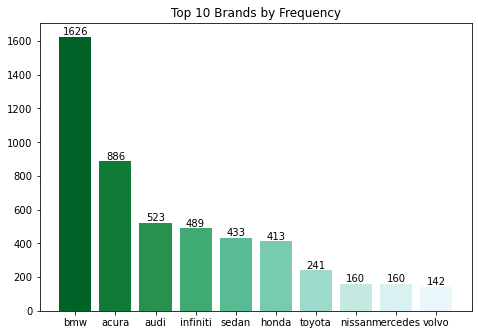

In [49]:
top10_brand = brand_count_df.head(10)

# bar plot of top 10 brands
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure()    # initiate a figure
ax = fig.add_axes([0,0,1,1])    #  set up plot size and axes
k = ax.bar(top10_brand['Brand'],top10_brand['Count'],color = sns.color_palette('BuGn_r',10))    # bar plot
ax.bar_label(k)     # generate data labels at the top of each bar
plt.title('Top 10 Brands by Frequency')
plt.show()

## Wordcloud

In [16]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

There are 2885592 words in the combination of all review.


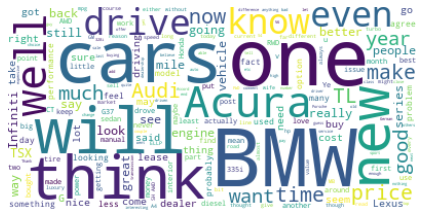

In [17]:
# wordcloud from All reviews
text = " ".join(review for review in review.Review)
print ("There are {} words in the combination of all review.".format(len(text)))
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["car", "preference", "attribute", "brand"])
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()
plt.show()

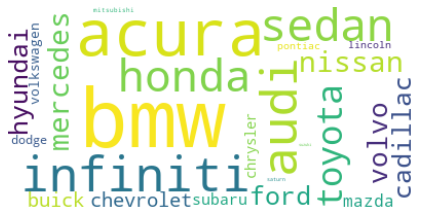

In [52]:
# brand wordcloud

d = {}
for a, x in brand_count_df.values:
    d[a] = x

import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(background_color="white")
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout()
plt.show()

## Lift Ratio
### 1. Calculation

In [19]:
lift_array = np.empty((len(top10_brand),len(top10_brand)))
lift_array[:] = np.NaN

In [20]:
N = len(review) # total number of reviews
N

5500

In [21]:
N = len(review)
for i in range(len(top10_brand)): 
    brand1 = top10_brand['Brand'][i]
    brand1_count =  top10_brand['Count'][i] # number of reviews containing brand 1
    
    for j in range(i+1, len(top10_brand)):
        brand2 = top10_brand['Brand'][j]
        brand2_count = top10_brand['Count'][j] # number of reviews containing brand 2
        
        brand1_2_count = 0 # number of reviews containing both brand 1 and 2
        for brands in review_brands:
            if brand1 in brands and brand2 in brands:
                brand1_2_count += 1
                
        lift = N*brand1_2_count/(brand1_count*brand2_count) # calculate lift
        lift_array[i,j] = lift

In [22]:
dissimi_array = 1/lift_array # calculate dissimilarity for MDS plot
#np.fill_diagonal(dissimi_array, 0) # dissimilarity between a brand and itself is 0
np.nan_to_num(dissimi_array, copy=False, nan=0.0)
dissimi_array = dissimi_array + dissimi_array.T  # fill the lower triangular part

In [23]:
lift_df = pd.DataFrame(data=lift_array, index=top10_brand['Brand'], columns=top10_brand['Brand'])
lift_df

Brand,bmw,acura,audi,infiniti,sedan,honda,toyota,nissan,mercedes,volvo
Brand,,,,,,,,,,
bmw,NaN,1.305673,1.998476,1.743146,1.476441,1.220333,1.235116,1.205028,2.071802,1.834191
acura,NaN,NaN,2.456957,2.373896,1.648690,3.216568,1.313657,1.551919,2.095090,2.404381
audi,NaN,NaN,NaN,2.817237,1.942957,1.884268,1.527257,1.051625,3.746415,3.702906
infiniti,NaN,NaN,NaN,NaN,1.740367,1.579544,1.913466,4.217791,3.022751,2.455428
sedan,NaN,NaN,NaN,NaN,NaN,1.783827,2.055523,2.302252,1.825924,2.415184
honda,NaN,NaN,NaN,NaN,NaN,NaN,2.983935,2.663438,1.747881,2.157010
toyota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.849585,3.280602,2.571445
nissan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.503906,0.726232
mercedes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.567782


In [24]:
dissimi_df = pd.DataFrame(data=dissimi_array, index=top10_brand['Brand'], columns=top10_brand['Brand'])
dissimi_df

Brand,bmw,acura,audi,infiniti,sedan,honda,toyota,nissan,mercedes,volvo
Brand,,,,,,,,,,
bmw,0.000000,0.765888,0.500381,0.573675,0.677304,0.819448,0.809640,0.829856,0.482672,0.545200
acura,0.765888,0.000000,0.407007,0.421248,0.606542,0.310890,0.761234,0.644364,0.477306,0.415907
audi,0.500381,0.407007,0.000000,0.354958,0.514680,0.530710,0.654769,0.950909,0.266922,0.270058
infiniti,0.573675,0.421248,0.354958,0.000000,0.574592,0.633094,0.522612,0.237091,0.330825,0.407261
sedan,0.677304,0.606542,0.514680,0.574592,0.000000,0.560592,0.486494,0.434357,0.547668,0.414047
honda,0.819448,0.310890,0.530710,0.633094,0.560592,0.000000,0.335128,0.375455,0.572121,0.463605
toyota,0.809640,0.761234,0.654769,0.522612,0.486494,0.335128,0.000000,0.206203,0.304822,0.388886
nissan,0.829856,0.644364,0.950909,0.237091,0.434357,0.375455,0.206203,0.000000,0.664935,1.376970
mercedes,0.482672,0.477306,0.266922,0.330825,0.547668,0.572121,0.304822,0.664935,0.000000,0.179605


### 2. MDS Visualization

In [25]:
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

# fit our dissimilarity data frame into MDS
mds = MDS(2,random_state=0,dissimilarity='precomputed')
coordinates = mds.fit_transform(dissimi_df)

# generate coordinate for plotting
coordinates_df = pd.DataFrame(data=coordinates)

Text(0.5, 1.0, 'Elbow Method for KMeans Clustering with Lift Ratio')

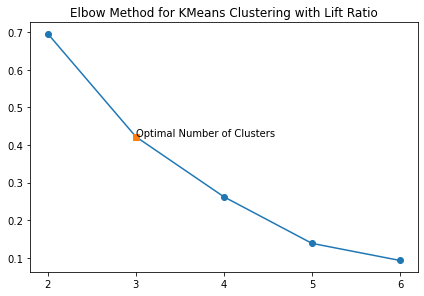

In [26]:
# we want to separate car brands into different communities
# therefore we need to performan unsupervised learning to determine clusters

# we first need to find out the optimal number of clusters via Elbow Method
from sklearn.cluster import KMeans
withinss = []
for i in range(2,7):
    kmeans = KMeans(n_clusters = i)
    cluster = kmeans.fit(coordinates_df)
    labels = cluster.predict(coordinates_df)
    withinss.append(cluster.inertia_)

# plotting out elbow method result
import matplotlib.pyplot as plt
plt.xticks(np.arange(2, 7, 1))
plt.plot([2,3,4,5,6],withinss,'-o')
x0 = [3]
y0 = [withinss[1]]
plt.plot(x0, y0, "s")
plt.annotate("Optimal Number of Clusters", (x0[0], y0[0]))
plt.tight_layout()
plt.title("Elbow Method for KMeans Clustering with Lift Ratio")

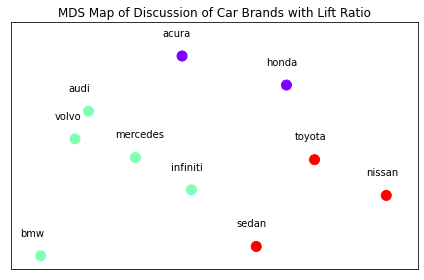

In [27]:
# The optimal number of clusters is 3
# Then we perform K Means clustering with number of clusters = 3
kmeans = KMeans(n_clusters = 3)
cluster = kmeans.fit(coordinates_df)
labels = cluster.predict(coordinates_df)
plt.scatter(coordinates_df.iloc[:,:1],coordinates_df.iloc[:,1:2],c=labels,cmap='rainbow',s=100)

# plotting out the result of clustering

for i in range(len(dissimi_df.columns)):
    x = coordinates[i,0]
    y = coordinates[i,1]
    plt.annotate(dissimi_df.columns[i], xy = (x, y), xytext = (-20, 20),textcoords = 'offset points')
plt.xlim([-0.5, 0.6])    
plt.ylim([-0.4, 0.5]) 

#get current axes
ax = plt.gca()

#hide x-axis
ax.get_xaxis().set_visible(False)

#hide y-axis
ax.get_yaxis().set_visible(False)

plt.title("MDS Map of Discussion of Car Brands with Lift Ratio")

plt.tight_layout()
plt.show()

## Jaccard Index
### 1. Calculation

In [28]:
# Initiate array to contain jaccard index
jaccard_array = np.empty((len(top10_brand),len(top10_brand)))
jaccard_array[:] = np.NaN

In [30]:
# Jaccard index calculation
N = len(review)
for i in range(len(top10_brand)): 
    brand1 = top10_brand['Brand'][i]
    brand1_count =  top10_brand['Count'][i] # number of reviews containing brand 1
    
    for j in range(i+1, len(top10_brand)):
        brand2 = top10_brand['Brand'][j]
        brand2_count = top10_brand['Count'][j] # number of reviews containing brand 2
        
        brand1_2_count = 0 # number of reviews containing both brand 1 and 2
        for brands in review_brands:
            if brand1 in brands and brand2 in brands:
                brand1_2_count += 1
                
        jaccard = brand1_2_count/(brand1_count+brand2_count-brand1_2_count) # calculate jaccard
        jaccard_array[i,j] = jaccard  

In [31]:
np.nan_to_num(jaccard_array, copy=False, nan=0.0)
jaccard_array = jaccard_array + jaccard_array.T  # fill the lower triangular part

In [32]:
jaccard_df = pd.DataFrame(data=jaccard_array, index=top10_brand['Brand'], columns=top10_brand['Brand'])
jaccard_df

Brand,bmw,acura,audi,infiniti,sedan,honda,toyota,nissan,mercedes,volvo
Brand,,,,,,,,,,
bmw,0.000000,0.157604,0.167935,0.135266,0.101070,0.078836,0.049466,0.032967,0.058057,0.045535
acura,0.157604,0.000000,0.172213,0.157407,0.095515,0.197235,0.047398,0.039761,0.054435,0.056526
audi,0.167935,0.172213,0.000000,0.148695,0.091324,0.085847,0.048011,0.023988,0.091054,0.081301
infiniti,0.135266,0.157407,0.148695,0.000000,0.078363,0.068720,0.059507,0.101868,0.070957,0.051667
sedan,0.101070,0.095515,0.091324,0.078363,0.000000,0.073604,0.061417,0.051418,0.040351,0.049270
honda,0.078836,0.197235,0.085847,0.068720,0.073604,0.000000,0.090000,0.059150,0.038043,0.043233
toyota,0.049466,0.047398,0.048011,0.059507,0.061417,0.090000,0.000000,0.092643,0.060847,0.043597
nissan,0.032967,0.039761,0.023988,0.101868,0.051418,0.059150,0.092643,0.000000,0.022364,0.010033
mercedes,0.058057,0.054435,0.091054,0.070957,0.040351,0.038043,0.060847,0.022364,0.000000,0.082437


### 2. MDS Visualization

In [33]:
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

# fit our jaccard data frame into MDS
mds = MDS(2,random_state=0,dissimilarity='precomputed')
coordinates = mds.fit_transform(jaccard_df)

# generate coordinate for plotting
coordinates_df = pd.DataFrame(data=coordinates)

Text(0.5, 1.0, 'Elbow Method for KMeans Clustering with Jaccard Index')

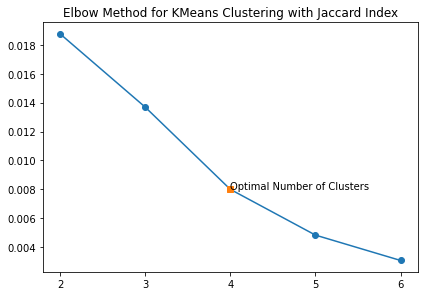

In [34]:
# we want to separate car brands into different communities
# therefore we need to performan unsupervised learning to determine clusters

# we first need to find out the optimal number of clusters via Elbow Method
from sklearn.cluster import KMeans
withinss = []
for i in range(2,7):
    kmeans = KMeans(n_clusters = i)
    cluster = kmeans.fit(coordinates_df)
    labels = cluster.predict(coordinates_df)
    withinss.append(cluster.inertia_)

# plotting out elbow method result
import matplotlib.pyplot as plt
plt.xticks(np.arange(2, 7, 1))
plt.plot([2,3,4,5,6],withinss,'-o')
x0 = [4]
y0 = [withinss[2]]
plt.plot(x0, y0, "s")
plt.annotate("Optimal Number of Clusters", (x0[0], y0[0]))
plt.tight_layout()
plt.title("Elbow Method for KMeans Clustering with Jaccard Index")

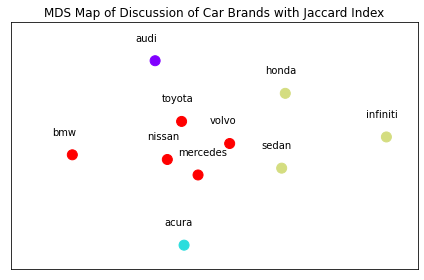

In [35]:
# The optimal number of clusters is 4
# Then we perform K Means clustering with number of clusters = 4
kmeans = KMeans(n_clusters = 4)
cluster = kmeans.fit(coordinates_df)
labels = cluster.predict(coordinates_df)
plt.scatter(coordinates_df.iloc[:,:1],coordinates_df.iloc[:,1:2],c=labels,cmap='rainbow',s=100)

# plotting out the result of clustering

for i in range(len(dissimi_df.columns)):
    x = coordinates[i,0]
    y = coordinates[i,1]
    plt.annotate(dissimi_df.columns[i], xy = (x, y), xytext = (-20, 20),textcoords = 'offset points')

plt.xlim([-0.09, 0.09])    
plt.ylim([-0.11, 0.11])    

#get current axes
ax = plt.gca()

#hide x-axis
ax.get_xaxis().set_visible(False)

#hide y-axis
ax.get_yaxis().set_visible(False)

plt.title("MDS Map of Discussion of Car Brands with Jaccard Index")

plt.tight_layout()
plt.show()

## Salton Cosine
### 1. Calculation

In [36]:
# Initiate array to contain Salton Cosine values
cosine_array = np.empty((len(top10_brand),len(top10_brand)))
cosine_array[:] = np.NaN

In [37]:
# Salton Cosine calculation
N = len(review)
for i in range(len(top10_brand)): 
    brand1 = top10_brand['Brand'][i]
    brand1_count =  top10_brand['Count'][i] # number of reviews containing brand 1
    
    for j in range(i+1, len(top10_brand)):
        brand2 = top10_brand['Brand'][j]
        brand2_count = top10_brand['Count'][j] # number of reviews containing brand 2
        
        brand1_2_count = 0 # number of reviews containing both brand 1 and 2
        for brands in review_brands:
            if brand1 in brands and brand2 in brands:
                brand1_2_count += 1
            
        cosine = brand1_2_count/np.sqrt(brand1_count*brand2_count) # calculate Salton cosine
        cosine_array[i,j] = cosine

In [38]:
np.nan_to_num(cosine_array, copy=False, nan=0.0)
cosine_array = cosine_array + cosine_array.T  # fill the lower triangular part

In [39]:
cosine_df = pd.DataFrame(data=cosine_array, index=top10_brand['Brand'], columns=top10_brand['Brand'])
cosine_df

Brand,bmw,acura,audi,infiniti,sedan,honda,toyota,nissan,mercedes,volvo
Brand,,,,,,,,,,
bmw,0.000000,0.284937,0.335079,0.282609,0.225246,0.181824,0.140577,0.111752,0.192135,0.160246
acura,0.284937,0.000000,0.304090,0.284099,0.185668,0.353771,0.110368,0.106239,0.143422,0.155061
audi,0.335079,0.304090,0.000000,0.259040,0.168111,0.159223,0.098585,0.055311,0.197044,0.183474
infiniti,0.282609,0.284099,0.259040,0.000000,0.145605,0.129062,0.119432,0.214505,0.153728,0.117642
sedan,0.225246,0.185668,0.168111,0.145605,0.000000,0.137154,0.120729,0.110178,0.087382,0.108887
honda,0.181824,0.353771,0.159223,0.129062,0.137154,0.000000,0.171163,0.124484,0.081693,0.094975
toyota,0.140577,0.110368,0.098585,0.119432,0.120729,0.171163,0.000000,0.173145,0.117128,0.086490
nissan,0.111752,0.106239,0.055311,0.214505,0.110178,0.124484,0.173145,0.000000,0.043750,0.019903
mercedes,0.192135,0.143422,0.197044,0.153728,0.087382,0.081693,0.117128,0.043750,0.000000,0.152589


### 2. MDS Visualization

In [40]:
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

# fit our Salton Cosine data frame into MDS
mds = MDS(2,random_state=0,dissimilarity='precomputed')
coordinates = mds.fit_transform(cosine_df)

# generate coordinate for plotting
coordinates_df = pd.DataFrame(data=coordinates)

Text(0.5, 1.0, 'Elbow Method for KMeans Clustering with Jaccard Index')

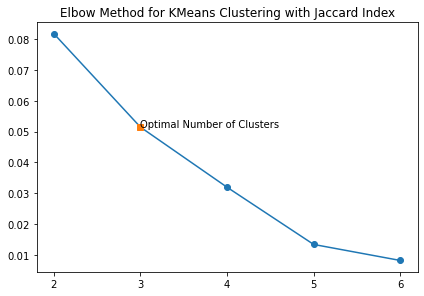

In [41]:
# we want to separate car brands into different communities
# therefore we need to performan unsupervised learning to determine clusters

# we first need to find out the optimal number of clusters via Elbow Method
from sklearn.cluster import KMeans
withinss = []
for i in range(2,7):
    kmeans = KMeans(n_clusters = i)
    cluster = kmeans.fit(coordinates_df)
    labels = cluster.predict(coordinates_df)
    withinss.append(cluster.inertia_)

# plotting out elbow method result
import matplotlib.pyplot as plt
plt.xticks(np.arange(2, 7, 1))
plt.plot([2,3,4,5,6],withinss,'-o')
x0 = [3]
y0 = [withinss[1]]
plt.plot(x0, y0, "s")
plt.annotate("Optimal Number of Clusters", (x0[0], y0[0]))
plt.tight_layout()
plt.title("Elbow Method for KMeans Clustering with Jaccard Index")

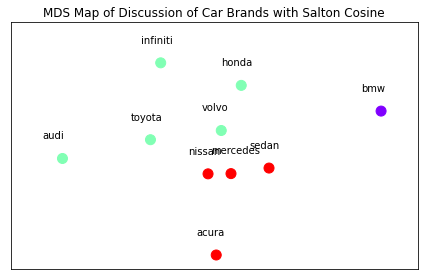

In [42]:
# The optimal number of clusters is 3
# Then we perform K Means clustering with number of clusters = 3
kmeans = KMeans(n_clusters = 3)
cluster = kmeans.fit(coordinates_df)
labels = cluster.predict(coordinates_df)
plt.scatter(coordinates_df.iloc[:,:1],coordinates_df.iloc[:,1:2],c=labels,cmap='rainbow',s=100)

# plotting out the result of clustering

for i in range(len(dissimi_df.columns)):
    x = coordinates[i,0]
    y = coordinates[i,1]
    plt.annotate(dissimi_df.columns[i], xy = (x, y), xytext = (-20, 20),textcoords = 'offset points')

plt.xlim([-0.2, 0.2])    
plt.ylim([-0.2, 0.2])    

#get current axes
ax = plt.gca()

#hide x-axis
ax.get_xaxis().set_visible(False)

#hide y-axis
ax.get_yaxis().set_visible(False)

plt.title("MDS Map of Discussion of Car Brands with Salton Cosine")

plt.tight_layout()
plt.show()